# Pre-processing

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


import requests
from bs4 import BeautifulSoup    
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
from collections import Counter
import re


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)


pd.options.display.max_colwidth = 400
%config InlineBackend.figure_format = 'retina'

In [2]:
nottheonion_df = pd.read_csv('nottheonion_df.csv')

In [3]:
uplifting_df = pd.read_csv('uplifting_df.csv')

In [4]:
nottheonion_df.sort_values(by='score', ascending=False).head(10)

,datetime,title,score,num_comments,subreddit,title_len,title_word_count
848,2020-06-08 14:02:37,US Military Could Lose Space Force Trademark to Netflix Series,118958,3009,nottheonion,62,10
7316,2018-07-26 16:45:54,"Nat Geo hires Jeff Goldblum to walk around, being professionally fascinated by things",99729,1551,nottheonion,85,13
7563,2018-07-10 00:55:03,"Reddit CEO tells user, “we are not the thought police,” then suspends that user",89214,7004,nottheonion,79,14
10414,2017-12-05 19:17:39,Mike Pence Once Ratted Out His Fraternity Brothers For Having a Keg,88005,5587,nottheonion,67,12
5888,2019-03-06 14:12:03,"Hipster whines at tech mag for using his pic to imply hipsters look the same, discovers pic was of an entirely different hipster",82095,2309,nottheonion,128,23
10113,2018-01-07 21:37:17,"R.I.P. astronaut John Young, the first man to get yelled at for smuggling a sandwich into space",81548,1153,nottheonion,95,17
428,2020-07-20 22:25:15,'They’re going to get over it': Missouri Gov. insists kids must go back to school even though 'they will' get COVID-19,79670,11664,nottheonion,118,21
1510,2019-10-15 03:05:28,35 Y.O CEO Slams Other Millennials For Entitlement Despite Being Handed CEO Job By His Dad,79405,3361,nottheonion,90,16
9478,2018-02-26 17:41:12,President Trump: I would have run into school during shooting ‘even if I didn’t have a weapon’,75968,9956,nottheonion,94,17
8642,2018-04-25 13:44:01,"Dogs cannot get ‘autism’, British Veterinary Association warns after ‘anti-vaxx’ movement spread to pets",74972,3136,nottheonion,104,14


In [218]:
uplifting_df.sort_values(by='score', ascending=False).head(10)

,datetime,title,score,num_comments
4457,2017-11-08 19:54:26,"Man falsely imprisoned for 10 years, uses prison library to study law and have his conviction overturned. Becomes a lawyer and is now helping overturn other false convictions.",124278,2449
239,2020-06-12 13:27:42,Over a Million People Sign Petition Calling For KKK to Be Declared a Terrorist Group,107322,5642
2099,2019-05-16 16:39:59,Amazon tribe wins legal battle against oil companies. Preventing drilling in Amazon Rainforest,103340,1794
1254,2019-08-19 17:19:26,"when China demands names of airline's employees who protested, CEO lists only himself",101471,2748
280,2020-06-09 14:45:27,"Chattanooga's Police Chief has updated his department's Code of Conduct, saying they have a duty to stop others in the department from committing illegal activities including acts of brutality and abuse of authority.",95325,1904
4534,2017-10-24 21:49:57,"Saudi Arabian heir to the crown has declared war on radical clerics, he also said ""We are returning to what we were before, a country of moderate Islam that is open to all religions and to the world.""",93663,3989
2026,2019-05-23 19:50:50,"Colorado becomes first state in nation to cap price of insulin. Under bill signed by governor this week, diabetics will pay no more than $100 a month for insulin.",86339,3890
3121,2018-07-22 18:04:48,Police say a teenager who attached uplifting messages to a bridge to help people facing a mental health crisis has helped save six lives.,85532,1287
4596,2017-10-13 18:19:40,Man finds $24 million lottery ticket in an old shirt -- just two days before it expires,84227,2559
2365,2019-04-10 20:06:40,13 Year Old Girl nicknamed 'Trash Girl' was regularly bullied for collecting trash on her way to school. On Friday she is to recieve a Points of Light Award award granted from Prime Minister Theresa May.,78324,1910


In [5]:


    
def tokenlem(title):
    tokenizer = RegexpTokenizer(r'\w+')
    lemmatizer = WordNetLemmatizer()
    
    tokens = [token.lower() for token in tokenizer.tokenize(title)]
   
    out = []
    for token in tokens:
        lem = lemmatizer.lemmatize(token)
        out.append(lem)
        if token != lem:
            print(token, lem)
    return ' '.join(out)

    

In [6]:
nottheonion_df['title'] = nottheonion_df['title'].apply(lambda x: tokenlem(x))
uplifting_df['title'] = uplifting_df['title'].apply(lambda x: tokenlem(x))

parents parent
crocodiles crocodile
ducks duck
protests protest
as a
canons canon
wins win
us u
parents parent
parents parent
says say
snowmen snowman
crocodiles crocodile
takes take
exams exam
as a
says say
mrs mr
children child
cities city
hotspots hotspot
hoops hoop
tests test
gets get
us u
says say
parents parent
encounters encounter
members member
guardians guardian
looks look
gets get
hours hour
covers cover
feet foot
less le
us u
members member
guardians guardian
sues sue
parents parent
cops cop
goes go
hunts hunt
members member
drivers driver
cookies cooky
crocodiles crocodile
parents parent
wants want
its it
rules rule
says say
protests protest
finds find
rules rule
households household
dildos dildo
vaccines vaccine
was wa
blames blame
as a
was wa
as a
gates gate
compares compare
vaccines vaccine
atrocities atrocity
years year
cuts cut
says say
mps mp
media medium
letters letter
trials trial
cases case
as a
as a
sounds sound
chickens chicken
chickens chicken
rules rule
clubs c

lashes lash
women woman
offerings offering
reports report
bans ban
sevens seven
cards card
colleagues colleague
shows show
was wa
walks walk
downs down
fights fight
americans american
officers officer
demonstrations demonstration
shows show
schools school
launchers launcher
rifles rifle
says say
does doe
comes come
portrayals portrayal
cops cop
urges urge
shows show
officers officer
riots riot
communications communication
parents parent
protesters protester
protesters protester
changes change
its it
casinos casino
as a
las la
vegas vega
as a
bans ban
cards card
as a
looters looter
businesses business
shows show
mosquitoes mosquito
us u
us u
faces face
allegations allegation
rights right
abuses abuse
protesters protester
its it
products product
cases case
us u
classrooms classroom
masks mask
hands hand
as a
as a
rates rate
was wa
tells tell
officers officer
banknotes banknote
says say
protests protest
calls call
attendees attendee
hands hand
rates rate
officials official
parties party
m

was wa
aestheticians aesthetician
rules rule
places place
venezuelans venezuelan
cigarettes cigarette
bans ban
wins win
its it
strips strip
efforts effort
suits suit
employees employee
devices device
has ha
thousands thousand
layoffs layoff
workers worker
cancels cancel
fires fire
suits suit
languages language
drones drone
cvs cv
prescriptions prescription
customers customer
states state
emoluments emolument
us u
troops troop
fields field
fans fan
classes class
studies study
questions question
students student
has ha
systems system
schools school
exams exam
takes take
thinks think
thieves thief
challenges challenge
carnivores carnivore
pets pet
children child
towns town
leaders leader
says say
sparks spark
censors censor
complaints complaint
students student
trips trip
breaks break
requests request
sells sell
inmates inmate
gets get
officials official
chops chop
citizens citizen
officials official
has ha
windows window
as a
schools school
gives give
rats rat
floppies floppy
ties tie
as

breaks break
tells tell
wins win
scientists scientist
couples couple
potatoes potato
critics critic
gives give
knifes knife
was wa
breaks break
cooks cook
tells tell
protesters protester
women woman
drinks drink
freaks freak
scientists scientist
brags brag
organizers organizer
tells tell
as a
tries try
toilets toilet
studios studio
months month
children child
has ha
rights right
performers performer
gets get
ties tie
bans ban
products product
urges urge
options option
doctors doctor
deals deal
writers writer
has ha
numbers number
says say
ads ad
times time
as a
toys toy
as a
stores store
has ha
twins twin
triplets triplet
chickens chicken
years year
groups group
students student
questions question
has ha
trolls troll
authorities authority
parents parent
maths math
tetris tetri
complaints complaint
portraits portrait
atheists atheist
owners owner
says say
records record
pics pic
was wa
des de
as a
scholars scholar
parks park
finds find
americans american
cars car
complications complicat

chemicals chemical
wants want
flags flag
islands island
microchips microchip
brains brain
taunts taunt
officers officer
fakes fake
alps alp
was wa
phones phone
makes make
burgers burger
was wa
questions question
tweets tweet
republicans republican
questions question
questions question
humans human
calls call
has ha
kids kid
years year
years year
guts gut
was wa
problems problem
doctors doctor
says say
burns burn
officials official
bans ban
colleges college
us u
tweets tweet
tickets ticket
says say
its it
tweets tweet
launches launch
consoles console
sparks spark
mourners mourner
houses house
farmers farmer
bottles bottle
has ha
farmers farmer
fights fight
gets get
accidents accident
says say
as a
breaks break
offenders offender
executives executive
fans fan
feet foot
lawmakers lawmaker
criminals criminal
says say
rewrites rewrite
researchers researcher
clashes clash
says say
upsets upset
says say
was wa
priests priest
children child
us u
rules rule
airlines airline
horses horse
as a
an

years year
was wa
pulls pull
plates plate
shoots shoot
bicyclists bicyclist
congresswomen congresswoman
seagulls seagull
residents resident
passes pass
as a
steals steal
allegations allegation
taxes tax
pledges pledge
pounds pound
ounces ounce
services service
owners owner
feet foot
gets get
years year
chews chew
says say
claims claim
reports report
equations equation
as a
has ha
as a
focuses focus
drugs drug
pleas plea
fines fine
tourists tourist
as a
leads lead
dies dy
troubles trouble
tells tell
parents parent
kids kid
files file
us u
was wa
fans fan
offers offer
captions caption
pledges pledge
cats cat
looks look
sandwiches sandwich
signs sign
looks look
stores store
tacos taco
has ha
as a
switches switch
us u
artists artist
thousands thousand
sites site
shops shop
as a
blocks block
distributors distributor
drops drop
initials initial
requests request
parents parent
kids kid
lunches lunch
kids kid
astronauts astronaut
finds find
holds hold
spirits spirit
dies dy
parents parent
kids

makes make
messages message
combats combat
bags bag
meals meal
sites site
users user
protests protest
tvs tv
says say
says say
forecasts forecast
americans american
surges surge
as a
tweets tweet
americans american
as a
finds find
says say
drives drive
sweets sweet
does doe
whiskers whisker
ears ear
hijacks hijack
steals steal
sons son
sues sue
says say
works work
says say
farmers farmer
floods flood
joins join
photos photo
years year
shares share
photos photo
helps help
says say
women woman
turns turn
fires fire
uses us
its it
sparks spark
yearbooks yearbook
concerns concern
photos photo
tells tell
has ha
floats float
women woman
funerals funeral
times time
humans human
spikes spike
skulls skull
dresses dress
has ha
mars mar
was wa
years year
calls call
foils foil
decisions decision
tons ton
seconds second
faces face
dui duo
charges charge
sideswipes sideswipe
bans ban
shows show
parents parent
its it
faces face
charges charge
arabs arab
jews jew
as a
as a
inmates inmate
leads lead
ch

sparks spark
americans american
avengers avenger
dies dy
goblins goblin
says say
dudes dude
goods good
seeks seek
yachts yacht
employees employee
us u
bottles bottle
urges urge
ass as
says say
calls call
bans ban
its it
tries try
flips flip
takes take
meals meal
blames blame
finds find
years year
children child
jews jew
pulls pull
syringes syrinx
stores store
says say
signs sign
calls call
laws law
gets get
us u
players player
as a
sources source
avocados avocado
says say
clips clip
claims claim
ends end
scolds scold
has ha
says say
scores score
goals goal
falls fall
hundreds hundred
children child
plays play
dishes dish
authorities authority
wants want
less le
tries try
says say
as a
crooks crook
toothpastes toothpaste
us u
players player
relations relation
puts put
calls call
raises raise
stores store
games game
dues due
rejects reject
chances chance
windows window
wants want
drugs drug
shoots shoot
times time
weekends weekend
as a
lawyers lawyer
hundreds hundred
bugs bug
leads lead


workaholics workaholic
condoms condom
cigarettes cigarette
plans plan
cops cop
bystanders bystander
scouts scout
sales sale
tells tell
was wa
cops cop
drugs drug
punishments punishment
says say
was wa
gets get
years year
thinks think
chokes choke
chips chip
goods good
classmates classmate
has ha
balls ball
takes take
nigerians nigerian
claims claim
rifles rifle
sheriffs sheriff
airlines airline
minutes minute
blames blame
faces face
charges charge
classmates classmate
shortages shortage
margaritas margarita
palates palate
finds find
monsters monster
sprites sprite
stops stop
mosquitos mosquito
signs sign
animals animal
americans american
was wa
countries country
rights right
violations violation
vegans vegan
disgusts disgust
eaters eater
books book
priests priest
fishermen fisherman
cookies cooky
as a
angers anger
parts part
jokes joke
claims claim
was wa
releases release
says say
norms norm
species specie
finds find
monsters monster
sprites sprite
stops stop
mosquitos mosquito
arrests

boss bos
says say
conservatives conservative
friends friend
says say
plans plan
says say
emissions emission
vegetables vegetable
bans ban
bags bag
runs run
tomatoes tomato
takes take
drains drain
puddings pudding
muslims muslim
camps camp
years year
sparks spark
media medium
cardinals cardinal
punches punch
years year
laws law
parents parent
graders grader
songs song
memes meme
us u
followers follower
dancers dancer
wages wage
dates date
its it
users user
faces face
violations violation
arms arm
wales wale
toes toe
says say
scolds scold
kids kid
drinks drink
says say
hippos hippo
boss bos
slams slam
says say
was wa
was wa
boss bos
says say
boss bos
lawmakers lawmaker
as a
as a
warnings warning
lawmakers lawmaker
exemptions exemption
kids kid
schools school
skills skill
vandals vandal
officials official
seeks seek
allegations allegation
borders border
dozens dozen
vultures vulture
patriots patriot
traits trait
as a
republicans republican
calls call
minutes minute
says say
builds build
s

says say
falls fall
students student
documents document
farts fart
months month
gets get
wants want
footprints footprint
airlines airline
its it
years year
songs song
years year
wants want
cars car
says say
funds fund
funds fund
elections election
takes take
less le
places place
says say
wants want
refineries refinery
effects effect
says say
gets get
officials official
as a
groups group
crops crop
cannons cannon
bumpers bumper
owners owner
teens teen
falls fall
falls fall
wants want
acronyms acronym
adds add
experts expert
us u
internationals international
raiders raider
las la
vegas vega
teens teen
was wa
creators creator
plays play
kills kill
parrots parrot
decisions decision
shows show
conservatives conservative
as a
members member
breaks break
steals steal
melts melt
ruins ruin
convictions conviction
loves love
cops cop
gets get
changes change
ids id
animals animal
says say
uses us
falls fall
hours hour
drones drone
mosquitoes mosquito
pulls pull
wants want
gets get
animals animal


helps help
icelanders icelander
salts salt
fireflies firefly
lasers laser
times time
students student
rescues rescue
exposes expose
murders murder
graphics graphic
humans human
armadillos armadillo
poachers poacher
lions lion
says say
blows blow
has ha
kids kid
parents parent
fries fry
dies dy
divorces divorce
years year
thinks think
labels label
as a
claims claim
was wa
poachers poacher
lions lion
clouds cloud
us u
seagulls seagull
firefighters firefighter
gets get
buttons button
crows crow
jerks jerk
ravens raven
as a
plays play
hours hour
smashes smash
us u
votes vote
actors actor
members member
phones phone
shoots shoot
sets set
us u
kills kill
avengers avenger
sparks spark
takes take
less le
salts salt
shots shot
fireflies firefly
lasers laser
reels reel
shoots shoot
wars war
women woman
crimes crime
was wa
tries try
posts post
divorces divorce
years year
hates hate
quails quail
supremacists supremacist
shootings shooting
says say
parents parent
claims claim
its it
clouds cloud
fa

says say
scientists scientist
octopuses octopus
aliens alien
bodies body
throws throw
teachers teacher
entrances entrance
calls call
players player
dogs dog
blames blame
exits exit
entrances entrance
removes remove
its it
raises raise
kids kid
neighbors neighbor
allegations allegation
swingers swinger
locations location
blasts blast
dachshunds dachshund
cracks crack
naturists naturist
reports report
punches punch
rooms room
students student
grimes grime
floats float
schools school
parents parent
months month
files file
blames blame
entrances entrance
shootings shooting
rocks rock
falls fall
crashes crash
students student
says say
providers provider
pockets pocket
blames blame
mugshots mugshot
owners owner
charges charge
pools pool
women woman
says say
its it
dolphins dolphin
orders order
dodges dodge
bullets bullet
hands hand
says say
rocks rock
seas sea
women woman
raccoons raccoon
throws throw
has ha
times time
keeps keep
dachshunds dachshund
attacks attack
kills kill
hippos hippo
te

attacks attack
employees employee
burgers burger
gives give
purchases purchase
tetris tetri
plans plan
touts tout
believes belief
blasts blast
squirrels squirrel
cities city
humans human
officials official
says say
spies spy
lawyers lawyer
songs song
shocks shock
vegans vegan
says say
was wa
polls poll
us u
diplomats diplomat
says say
kids kid
shootings shooting
rules rule
blasts blast
claims claim
faces face
wants want
tells tell
was wa
has ha
ties tie
us u
tours tour
has ha
laws law
kids kid
classes class
sprays spray
passengers passenger
thinks think
launches launch
fans fan
women woman
professors professor
students student
women woman
releases release
rules rule
dogs dog
sandwiches sandwich
attacks attack
arches arch
refuses refuse
cheeseburgers cheeseburger
attacks attack
arches arch
refuses refuse
cheeseburgers cheeseburger
arms arm
teachers teacher
rocks rock
concerns concern
as a
tanks tank
years year
deputies deputy
has ha
students student
rocks rock
says say
takes take
condim

airlines airline
takes take
republicans republican
aides aide
staffers staffer
as a
horses horse
charges charge
shorts short
says say
humans human
docs doc
wants want
has ha
daughters daughter
eggs egg
safeguards safeguard
trucks truck
us u
explosives explosive
heads head
defectors defector
stars star
less le
says say
steals steal
starts start
naps nap
pulls pull
tells tell
missiles missile
dinosaurs dinosaur
lawmakers lawmaker
pods pod
less le
talks talk
nipples nipple
says say
calls call
dolls doll
children child
eagles eagle
gets get
chips chip
women woman
breaks break
crisps crisp
fries fry
says say
ladies lady
crisps crisp
as a
its it
boss bos
says say
women woman
fingers finger
disabilities disability
breaks break
dies dy
hits hit
critics critic
us u
lives life
says say
orders order
its it
users user
customs custom
roads road
sells sell
boxes box
cookies cooky
plunges plunge
points point
uses us
gets get
dies dy
weeks week
protests protest
throwers thrower
says say
has ha
rights 

wages wage
workers worker
girls girl
pence penny
brothers brother
feelings feeling
thousands thousand
followers follower
its it
women woman
drivers driver
villagers villager
fumes fume
dogs dog
immigrants immigrant
sues sue
was wa
pills pill
was wa
years year
showcases showcase
penguins penguin
tries try
pennies penny
officers officer
launches launch
us u
calls call
cops cop
says say
as a
cooks cook
visitors visitor
toys toy
women woman
prisons prison
weapons weapon
its it
carriers carrier
states state
breaks break
gets get
says say
taunts taunt
turns turn
looks look
mars mar
takes take
cooks cook
lbs lb
causes cause
months month
feds fed
cockroaches cockroach
mice mouse
ants ant
pulls pull
shirts shirt
journalists journalist
says say
rights right
christians christian
says say
hands hand
twins twin
bags bag
parents parent
moves move
socks sock
lawmakers lawmaker
pass pas
clerks clerk
americans american
ambassadors ambassador
alerts alert
has ha
rats rat
says say
signs sign
rats rat
reg

calls call
protests protest
protests protest
residents resident
protests protest
protests protest
bullets bullet
shields shield
us u
statues statue
symbols symbol
protesters protester
deaths death
airmen airman
protesters protester
sanders sander
calls call
communities community
protesters protester
says say
months month
has ha
thousands thousand
protesters protester
us u
rallies rally
protests protest
elects elect
its it
schools school
shows show
gets get
seeds seed
dozens dozen
farmers farmer
brothers brother
kits kit
families family
dies dy
wins win
women woman
companies company
us u
parks park
nhs nh
has ha
abortions abortion
immigrants immigrant
grandparents grandparent
years year
days day
loans loan
businesses business
loans loan
nonprofits nonprofit
programs program
families family
emissions emission
levels level
has ha
days day
buys buy
raises raise
efforts effort
groceries grocery
bottles bottle
fugitives fugitive
was wa
states state
doctors doctor
facts fact
as a
claims claim

years year
biles bile
has ha
medals medal
emissions emission
cities city
kids kid
legos lego
puts put
legos lego
hands hand
kids kid
bricks brick
organizations organization
less le
consumers consumer
researchers researcher
values value
behaviors behavior
consumers consumer
elects elect
gifts gift
walks walk
miles mile
moves move
chemicals chemical
as a
concerns concern
flies fly
girls girl
aviators aviator
50s 50
decades decade
women woman
stadiums stadium
games game
goods good
guns gun
shelves shelf
stitches stitch
homes home
plumbers plumber
us u
employees employee
hours hour
benefits benefit
employees employee
scientists scientist
cells cell
foods food
has ha
blocks block
works work
cancers cancer
producers producer
goes go
workers worker
wins win
helps help
us u
imports import
was wa
wildfires wildfire
grasslands grassland
elephants elephant
tens ten
thousands thousand
hectares hectare
hills hill
elephants elephant
livelihoods livelihood
signs sign
bills bill
resources resource
pro

friends friend
stops stop
demands demand
seniors senior
helps help
was wa
cleats cleat
ones one
parks park
bees bee
stops stop
roofs roof
hundreds hundred
stops stop
plants plant
habitats habitat
bees bee
butterflies butterfly
decades decade
has ha
victims victim
us u
busts bust
says say
sisters sister
finds find
twins twin
weeks week
stops stop
rounds round
wins win
its it
holders holder
lenses lens
as a
looks look
trees tree
was wa
days day
ends end
firms firm
contracts contract
ships ship
decades decade
makes make
babies baby
women woman
pools pool
games game
players player
comes come
was wa
dads dad
siblings sibling
ages age
corals coral
decades decade
women woman
pools pool
gates gate
gives give
batteries battery
fuels fuel
was wa
pounds pound
lovers lover
has ha
women woman
leaves leaf
marches march
as a
rallies rally
refugees refugee
gives give
parks park
savings saving
workers worker
sales sale
says say
contracts contract
passes pass
persons person
rights right
starts start
dee

reviews review
scraps scrap
laws law
rights right
us u
bans ban
pays pay
steps step
plastics plastic
as a
bottles bottle
parents parent
guardians guardian
children child
fees fee
researchers researcher
tastes taste
as a
as a
goes go
embassies embassy
plastics plastic
as a
as a
memes meme
has ha
bikes bike
companies company
plans plan
children child
miles mile
families family
accommodations accommodation
thrones throne
fans fan
as a
launches launch
seedlings seedling
needs need
trees tree
pushes push
drugs drug
bottles bottle
oceans ocean
gets get
universities university
was wa
eggs egg
hens hen
tourists tourist
cosmetics cosmetic
animals animal
groceries grocery
raises raise
vests vest
dogs dog
us u
trees tree
mannequins mannequin
girls girl
protesters protester
teens teen
has ha
its it
vegetables vegetable
items item
tonnes tonne
its it
fruits fruit
vegetables vegetable
abortions abortion
women woman
states state
nuns nun
nones none
nuns nun
thousands thousand
channels channel
student

shoes shoe
lions lion
lions lion
opens open
doors door
students student
streets street
makes make
straws straw
days day
students student
competitions competition
lives life
lawmakers lawmaker
containers container
as a
dinners dinner
students student
visitors visitor
months month
makes make
trains train
supermarkets supermarket
leaves leaf
sikhs sikh
trees tree
as a
years year
plastics plastic
addresses address
services service
as a
applications application
its it
kicks kick
kills kill
beats beat
reverses revers
says say
children child
couples couple
invites invite
dogs dog
accounts account
shows show
recipients recipient
whistleblowers whistleblower
entrepreneurs entrepreneur
shootings shooting
muslims muslim
tells tell
sells sell
was wa
years year
has ha
years year
years year
meals meal
kids kid
as a
us u
emissions emission
kansas kansa
buys buy
shoes shoe
victims victim
jaws jaw
says say
lives life
isis isi
ambushes ambush
bombers bomber
reports report
attacks attack
wins win
plans p

as a
as a
kids kid
minds mind
screens screen
koreans korean
members member
years year
skies sky
as a
pays pay
works work
hours hour
jobs job
as a
gets get
braces brace
hacks hack
wants want
floods flood
baskets basket
was wa
was wa
women woman
has ha
years year
says say
nurses nurse
saves save
models model
riches rich
lives life
actresses actress
reeves reef
years year
wants want
was wa
years year
has ha
teachers teacher
days day
was wa
supplies supply
turtles turtle
efforts effort
decades decade
hundreds hundred
messages message
shoots shoot
helps help
gets get
us u
comments comment
gets get
days day
teachers teacher
us u
has ha
months month
officials official
girls girl
projects project
donors donor
gives give
dollars dollar
trees tree
years year
thinks think
has ha
wants want
lives life
cages cage
bears bear
jurors juror
has ha
its it
dreadlocks dreadlock
women woman
children child
teachers teacher
lives life
sisters sister
years year
years year
has ha
runs run
parks park
was wa
as 

throws throw
kittens kitten
families family
streets street
residents resident
cops cop
years year
has ha
costs cost
millions million
dollars dollar
figures figure
turbines turbine
has ha
outages outage
has ha
donations donation
babies baby
veterans veteran
families family
babies baby
smokes smoke
drinks drink
turns turn
years year
has ha
less le
babies baby
goes go
posts post
sells sell
gives give
challenges challenge
has ha
has ha
fuels fuel
plans plan
fuels fuel
passes pass
rights right
victims victim
searches search
departments department
builds build
matches match
dogs dog
was wa
years year
was wa
superiors superior
stops stop
brothers brother
years year
graduates graduate
years year
parents parent
papers paper
organs organ
turns turn
years year
has ha
descendants descendant
its it
has ha
was wa
helps help
its it
fjords fjord
wins win
as a
its it
its it
rescues rescue
was wa
its it
bars bar
bottles bottle
colleges college
scholarships scholarship
whales whale
birthrates birthrate
s

las la
vegas vega
was wa
years year
sharks shark
sees see
donations donation
charities charity
results result
cats cat
groups group
donations donation
reports report
hates hate
sharks shark
prices price
convictions conviction
wins win
workers worker
raises raise
grants grant
fills fill
pets pet
flies fly
animals animal
gates gate
years year
sites site
babies baby
wins win
refugees refugee
deaths death
pilots pilot
pilots pilot
migrants migrant
signs sign
girls girl
jobs job
workers worker
buttons button
employees employee
funds fund
years year
vows vow
eyes eye
peels peel
years year
saves save
owners owner
us u
captors captor
jews jew
captives captive
us u
americans american
captives captive
jews jew
employees employee
jobs job
startups startup
scientists scientist
dogs dog
dogs dog
owners owner
bullies bully
streets street
networks network
bans ban
scientists scientist
goals goal
johns john
has ha
forms form
makes make
boys boy
lifeguards lifeguard
lifesavers lifesaver
students studen

tunnels tunnel
hugs hug
steps step
boys boy
eagles eagle
charities charity
as a
says say
was wa
standards standard
was wa
photographs photograph
wildfires wildfire
minors minor
traffickers trafficker
americans american
children child
returns return
businesses business
saves save
refuses refuse
wildfires wildfire
goats goat
cops cop
crumbs crumb
escapes escape
oks ok
licenses license
certificates certificate
wildfires wildfire
goats goat
was wa
las la
vegas vega
reservations reservation
meals meal
opens open
its it
doors door
years year
cooks cook
victims victim
takes take
shaves shave
years year
las la
vegas vega
takes take
steps step
las la
vegas vega
wakes wake
students student
rescues rescue
highlands highland
as a
wildfires wildfire
refuses refuse
stays stay
animals animal
fires fire
sales sale
mills mill
finds find
days day
wildfires wildfire
offers offer
victims victim
its it
items item
rights right
organizations organization
years year
cards card
students student
animals animal


adults adult
wipes wipe
leads lead
women woman
women woman
children child
needs need
decades decade
hands hand
ones one
does doe
us u
shows show
boys boy
skirts skirt
shorts short
was wa
posters poster
bears bear
species specie
samaritans samaritan
bikes bike
miles mile
moves move
runs run
isis isi
finds find
cuddles cuddle
apartments apartment
families family
homes home
sentences sentence
inmates inmate
pumas puma
hundreds hundred
returns return
donations donation
reaches reach
buys buy
groceries grocery
inmates inmate
raises raise
babies baby
cars car
laws law
women woman
women woman
stops stop
airways airway
tickets ticket
finds find
hikers hiker
mistakes mistake
employs employ
waiters waiter
makes make
dads dad
fathers father
years year
millionaires millionaire
colors color
muslims muslim
christians christian
hijabs hijab
isis isi
philippines philippine
fossils fossil
means mean
moroccans moroccan
muslims muslim
days day
was wa
years year
votes vote
as a
officials official
tons ton

affairs affair
donations donation
meals meal
wheels wheel
makes make
dives dive
finds find
gives give
children child
finds find
rocks rock
readers reader
its it
buys buy
women woman
rescues rescue
woods wood
days day
turns turn
years year
cheerios cheerio
seeds seed
honeybees honeybee
boss bos
parents parent
republicans republican
directors director
as a
as a
joggers jogger
gives give
hugs hug
needs need
students student
cheerios cheerio
seeds seed
bees bee
helps help
taxis taxi
cars car
streets street
its it
artifacts artifact
fakes fake
hikes hike
miles mile
temperatures temperature
was wa
goes go
makes make
daughters daughter
donations donation
works work
miles mile
woods wood
retirees retiree
sweaters sweater
chickens chicken
runs run
students student
dalmatians dalmatian
meltdowns meltdown
students student
children child
immigrants immigrant
has ha
children child
days day
headlines headline
was wa
hands hand
moments moment
hugs hug
mugs mug
adults adult
internships internship
jobs

tips tip
holidays holiday
has ha
jobs job
employees employee
gets get
terrorists terrorist
opens open
raises raise
hours hour
kids kid
plans plan
its it
children child
has ha
vaccines vaccine
diseases disease
children child
sessions session
leaves leaf
hugs hug
has ha
racists racist
friends friend
views view
grants grant
inmates inmate
bans ban
crying cry
pulls pull
ends end
pounds pound
looks look
gets get
skateboarders skateboarder
kennels kennel
adoptions adoption
buys buy
was wa
americans american
acres acre
landowners landowner
parks park
states state
shows show
grants grant
commutations commutation
pardons pardon
individuals individual
victims victim
tears tear
minutes minute
reverses revers
uses us
swastikas swastika
hearts heart
has ha
parents parent
trees tree
children child
lives life
laws law
kids kid
builds build
homes home
meets meet
years year
buys buy
months month
saves save
babies baby
has ha
donations donation
cards card
members member
plants plant
toys toy
kids kid
ba

shows show
minutes minute
readers reader
shows show
tons ton
shoots shoot
hands hand
has ha
faces face
years year
as a
divers diver
kids kid
girls girl
winds wind
triplets triplet
girls girl
gets get
launches launch
refugees refugee
gives give
cvs cv
dollars dollar
cards card
has ha
returns return
kids kid
dogs dog
years year
comes come
heaps heap
textbooks textbook
coyotes coyote
years year
teachers teacher
sisters sister
months month
wheels wheel
troopers trooper
dui duo
walks walk
sees see
eyes eye
offers offer
tickets ticket
victims victim
costs cost
tells tell
freshmen freshman
does doe
warnings warning
spaces space
takes take
dogs dog
homes home
hours hour
murals mural
finds find
wins win
years year
ends end
says say
survivors survivor
years year
detectors detector
items item
wars war
strangers stranger
was wa
teens teen
books book
was wa
homes home
flags flag
finds find
years year
keeps keep
as a
forces force
belongings belonging
finds find
years year
streets street
as a
runners

authorities authority
leads lead
gifts gift
cards card
shows show
muslims muslim
offers offer
scars scar
populations population
schools school
has ha
its it
leaders leader
weights weight
rallies rally
bans ban
brooms broom
scientists scientist
stands stand
advocates advocate
animals animal
thousands thousand
followers follower
has ha
homes home
has ha
its it
feet foot
ranges range
animals animal
cats cat
dogs dog
homes home
saves save
scouts scout
shots shot
lives life
cats cat
gates gate
sidelines sideline
talks talk
gates gate
has ha
years year
knows know
years year
friends friend
families family
was wa
experiences experience
graduates graduate
classes class
bans ban
animals animal
circuses circus
eateries eatery
offenders offender
hours hour
graduates graduate
customers customer
overs over
refuses refuse
graders grader
things thing
turns turn
foods food
aids aid
patients patient
presents present
grandparents grandparent
shows show
us u
legs leg
goes go
as a
calls call
gives give
day

islands island
years year
restaurants restaurant
restaurants restaurant
bars bar
drunks drunk
sees see
hundreds hundred
lives life
attacks attack
packers packer
cousins cousin
offers offer
expenses expense
was wa
hundreds hundred
lives life
tests test
tackles tackle
lives life
hundreds hundred
troops troop
gives give
has ha
dogs dog
victims victim
pets pet
women woman
paws paw
shelters shelter
programs program
victims victim
pets pet
gives give
dreams dream
shoes shoe
throws throw
families family
wigs wig
children child
years year
makes make
friends friend
prints print
meets meet
rides ride
veterans veteran
interviews interview
has ha
has ha
finds find
nurses nurse
visits visit
weeks week
sardines sardine
has ha
grants grant
wars war
cards card
was wa
bills bill
saves save
wings wing
interactions interaction
us u
navies navy
crews crew
stories story
plans plan
holidays holiday
saves save
has ha
years year
streets street
meds med
gets get
wars war
cents cent
shares share
pictures pictur

profits profit
saves save
has ha
throws throw
kids kid
letters letter
as a
grants grant
employees employee
phones phone
thousands thousand
parents parent
things thing
thousands thousand
days day
was wa
jumps jump
nazis nazi
gets get
charities charity
scientists scientist
sensations sensation
dogs dog
lessons lesson
stakes stake
winnings winning
forges forge
says say
flies fly
miles mile
cells cell
immigrants immigrant
makes make
years year
doctors doctor
prayers prayer
taunts taunt
comments comment
years year
patients patient
neighbours neighbour
has ha
students student
uses us
savings saving
philippines philippine
leads lead
employees employee
children child
needs need
fights fight
tells tell
participants participant
drugs drug
assists assist
hedgehogs hedgehog
roads road
rations ration
lives life
comrades comrade
occasions occasion
has ha
launches launch
africans african
scholarships scholarship
graders grader
needs need
saves save
rams ram
players player
airs air
children child
meet

years year
less le
days day
grounds ground
elephants elephant
as a
ends end
cops cop
goes go
groceries grocery
lets let
prayers prayer
scouts scout
cookies cooky
claims claim
hands hand
hells hell
angels angel
bikes bike
owners owner
riots riot
cops cop
finds find
calls call
meets meet
athletes athlete
runs run
miles mile
swims swim
gets get
helps help
rallies rally
hugs hug
meals meal
raises raise
riots riot
huts hut
builds build
flats flat
residents resident
sees see
tears tear
leaves leaf
stays stay
years year
students student
fingers finger
streams stream
waterways waterway
habitats habitat
animals animal
plants plant
puts put
stays stay
hands hand
was wa
lives life
was wa
triplets triplet
twins twin
guys guy
sports sport
media medium
helps help
rescues rescue
hours hour
notes note
daughters daughter
residents resident
flies fly
ss s
was wa
years year
builds build
parents parent
gates gate
facilities facility
workers worker
rescues rescue
dogs dog
kids kid
homes home
veterans veter

pages page
veterinarians veterinarian
waits wait
years year
kids kid
skiers skier
hours hour
as a
voters voter
finds find
returns return
matters matter
haters hater
serenades serenade
moments moment
activists activist
as a
debtors debtor
hundreds hundred
teens teen
dresses dress
walks walk
schools school
dials dial
services service
collapses collapse
teams team
wants want
years year
talks talk
companies company
strangers stranger
likes like
finds find
dollars dollar
legs leg
was wa
visits visit
weeks week
copies copy
years year
things thing
as a
dogs dog
kisses kiss
gets get
sharks shark
tears tear
offers offer
writers writer
residencies residency
classmates classmate
days day
has ha
clutches clutch
locals local
gets get
clerics cleric
raises raise
watches watch
rapists rapist
kits kit
lessons lesson
prisons prison
criminals criminal
photos photo
deaths death
inhabitants inhabitant
moves move
contributions contribution
friends friend
sells sell
gives give
helps help
teens teen
risks ri

finds find
returns return
gets get
does doe
russians russian
pedestrians pedestrian
tenants tenant
pets pet
children child
sweethearts sweetheart
drops drop
boys boy
girls girl
friends friend
boys boy
runners runner
elephants elephant
makers maker
trucks truck
days day
thinks think
leaps leap
owners owner
needs need
parents parent
years year
has ha
has ha
enthusiasts enthusiast
years year
gets get
motorists motorist
strangers stranger
leaves leaf
thinks think
mails mail
sees see
opens open
opens open
women woman
opens open
girls girl
stars star
does doe
has ha
saves save
attempts attempt
puppies puppy
games game
feels feel
kids kid
girls girl
alerts alert
parents parent
was wa
as a
treks trek
miles mile
does doe
raises raise
movies movie
days day
penguins penguin
comes come
buttons button
floors floor
has ha
arms arm
neighbors neighbor
gets get
heroes hero
acts act
flowers flower
lives life
arrangements arrangement
minutes minute
shines shine
as a
comes come
stops stop
rallies rally
as

In [10]:
cv = CountVectorizer(stop_words='english', min_df=2)
cv.fit(nottheonion_df['title'])

ntotitle_cv = cv.transform(nottheonion_df['title'])
ntotitle_df = pd.DataFrame(ntotitle_cv.todense(), columns=cv.get_feature_names())




In [11]:
ntotitle_df.sum().sort_values(ascending=False).head(50)

man         1202
say         1120
woman        722
police       696
year         499
wa           407
new          397
school       362
people       302
sex          279
old          267
arrested     247
child        242
student      240
ha           216
gun          211
car          209
stop         194
black        188
home         187
000          186
day          185
white        185
claim        181
world        177
want         173
dog          169
ban          168
state        167
officer      164
make         163
cop          161
report       160
court        155
house        153
drug         152
accused      151
texas        149
men          145
florida      144
study        144
city         141
million      137
shooting     133
family       131
death        130
game         130
teen         130
time         130
like         128
dtype: int64

In [339]:
[title for title in nottheonion_df['title'] if 'accused' in title][:10]

['accused dead voter is alive and speaking out',
 'police accused porch pirate arrested when he show up at court in same shirt from surveillance pic',
 'the spanish family wrongly accused of child pornography due to a mistake reading a date',
 'woman accused of murder for hire plot against ex husband went to rent a hitman website',
 'ex officer accused of human right crime in argentina found living in berlin',
 'man allegedly linked to boogaloo movement accused of taking homemade machine gun to protest to kill cop',
 'officer who accused mcdonald s worker of taking a bite of his sandwich forgot he ate it',
 'officer who knelt with george floyd protester accused of insubordination a day later the san francisco examiner',
 'who accused of carrying china s water after official refuse to acknowledge taiwan during bizarre interview',
 'man accused of skinning dog to make doggy coat wa formerly charged with step father s murder']

In [12]:
cv = CountVectorizer(stop_words='english', min_df=2)
cv.fit(uplifting_df['title'])

uptitle_cv = cv.transform(uplifting_df['title'])
uptitle_df = pd.DataFrame(uptitle_cv.todense(), columns=cv.get_feature_names())


In [13]:
uptitle_df.sum().sort_values(ascending=False).head(50)

year        1587
man          855
old          836
woman        689
ha           659
new          627
dog          617
000          581
wa           556
school       494
life         470
boy          460
help         453
girl         448
day          435
million      412
child        410
people       400
save         392
free         387
world        357
family       353
time         353
homeless     341
home         337
student      330
police       291
make         274
say          270
ban          261
cancer       260
just         257
kid          254
100          243
pay          240
teen         235
car          230
baby         225
state        215
10           214
saved        214
donates      189
high         188
food         187
animal       180
lost         178
officer      176
plastic      176
cat          174
city         173
dtype: int64

In [331]:
[title for title in uplifting_df['title'] if 'million' in title.lower()][:10]

['dolly parton donated 1 million to help fund moderna covid 19 vaccine',
 'serum institute of india sii ha taken a risk to scale up production of the oxford covid 19 vaccine covishield to supply vaccine to the world at the earliest the company ha invested a whopping sum of usd 200 million fully knowing that if it fails they lose that amount',
 'greta thunberg the swedish environment campaigner ha been awarded a new humanitarian prize worth one million euro m thunberg said she will be donating the prize money to charitable project that are combating the climate and ecological crisis',
 'the number of undernourished people in india ha declined by 60 million in over a decade according to a un report',
 'five year old boy with two prosthetic leg ha raised almost aud 1 8 million for the hospital that saved his life when he wa just week old by walking a total of nine kilometre over the past month',
 'tanzanian miner becomes overnight millionaire',
 'the usa now ha 1 million people who have r

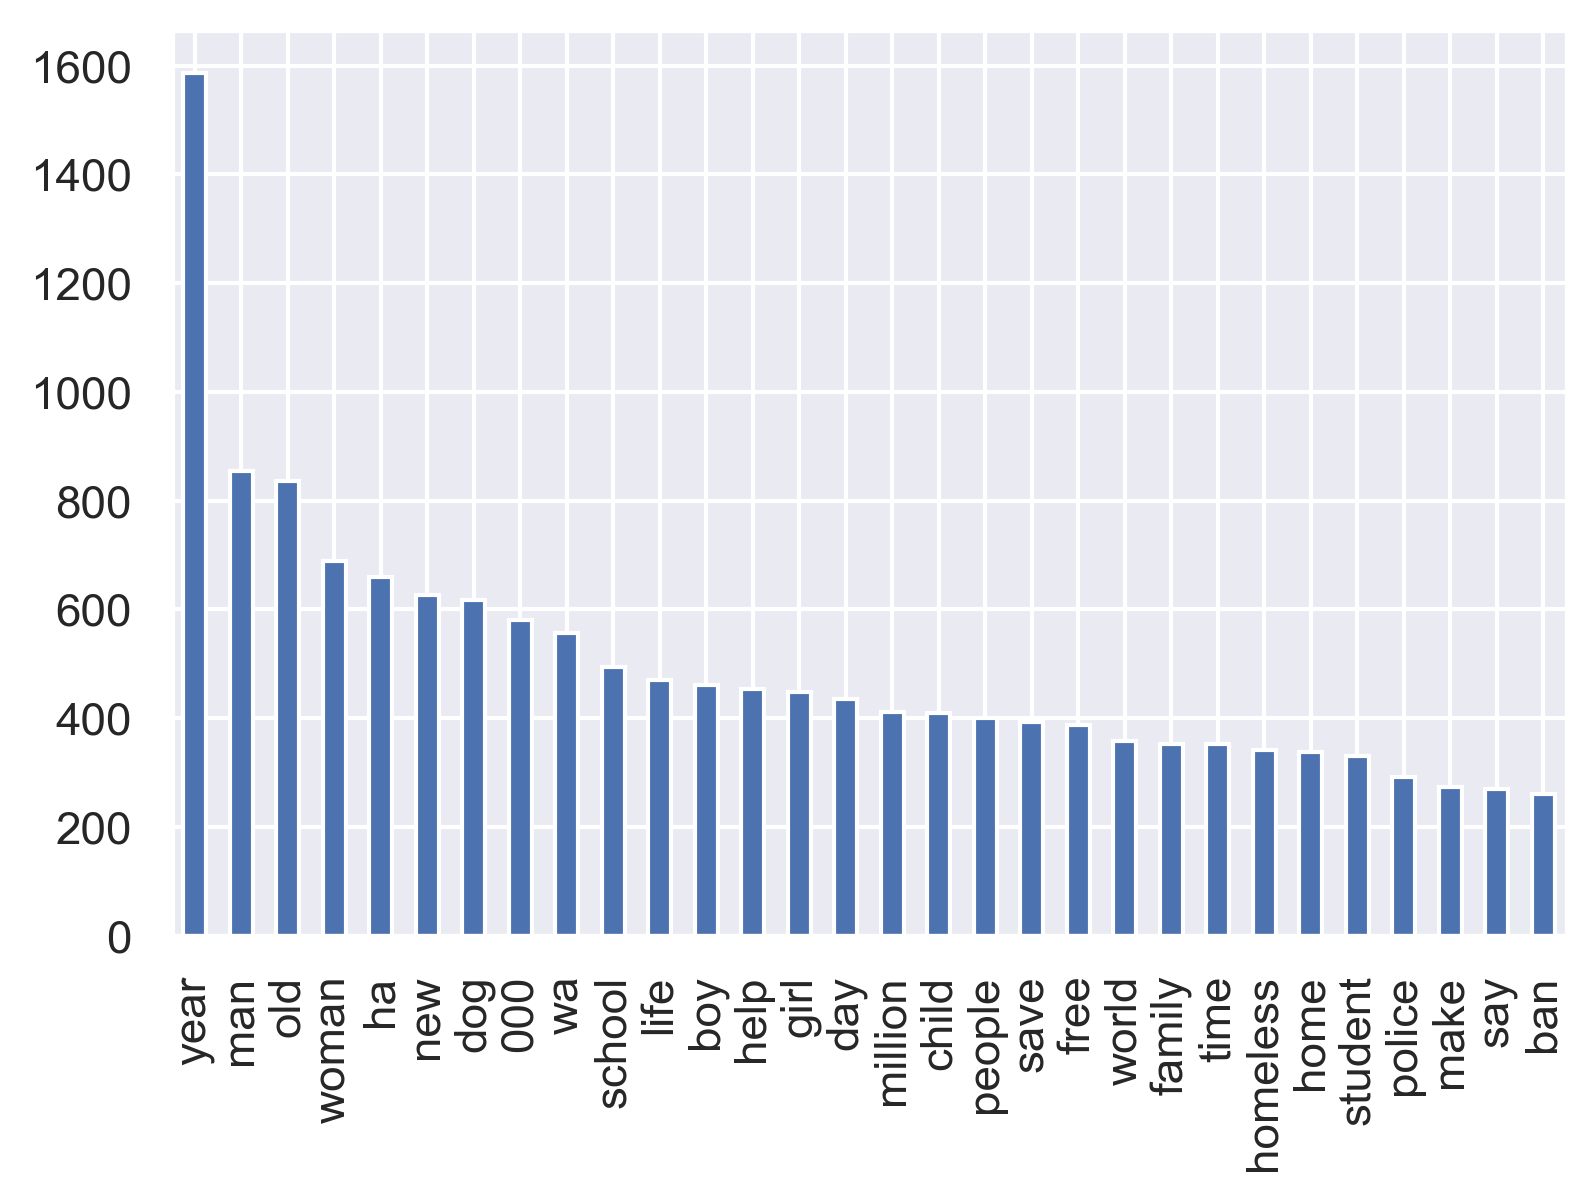

In [151]:
uptitle_df.sum().sort_values(ascending=False).head(30).plot(kind='bar');

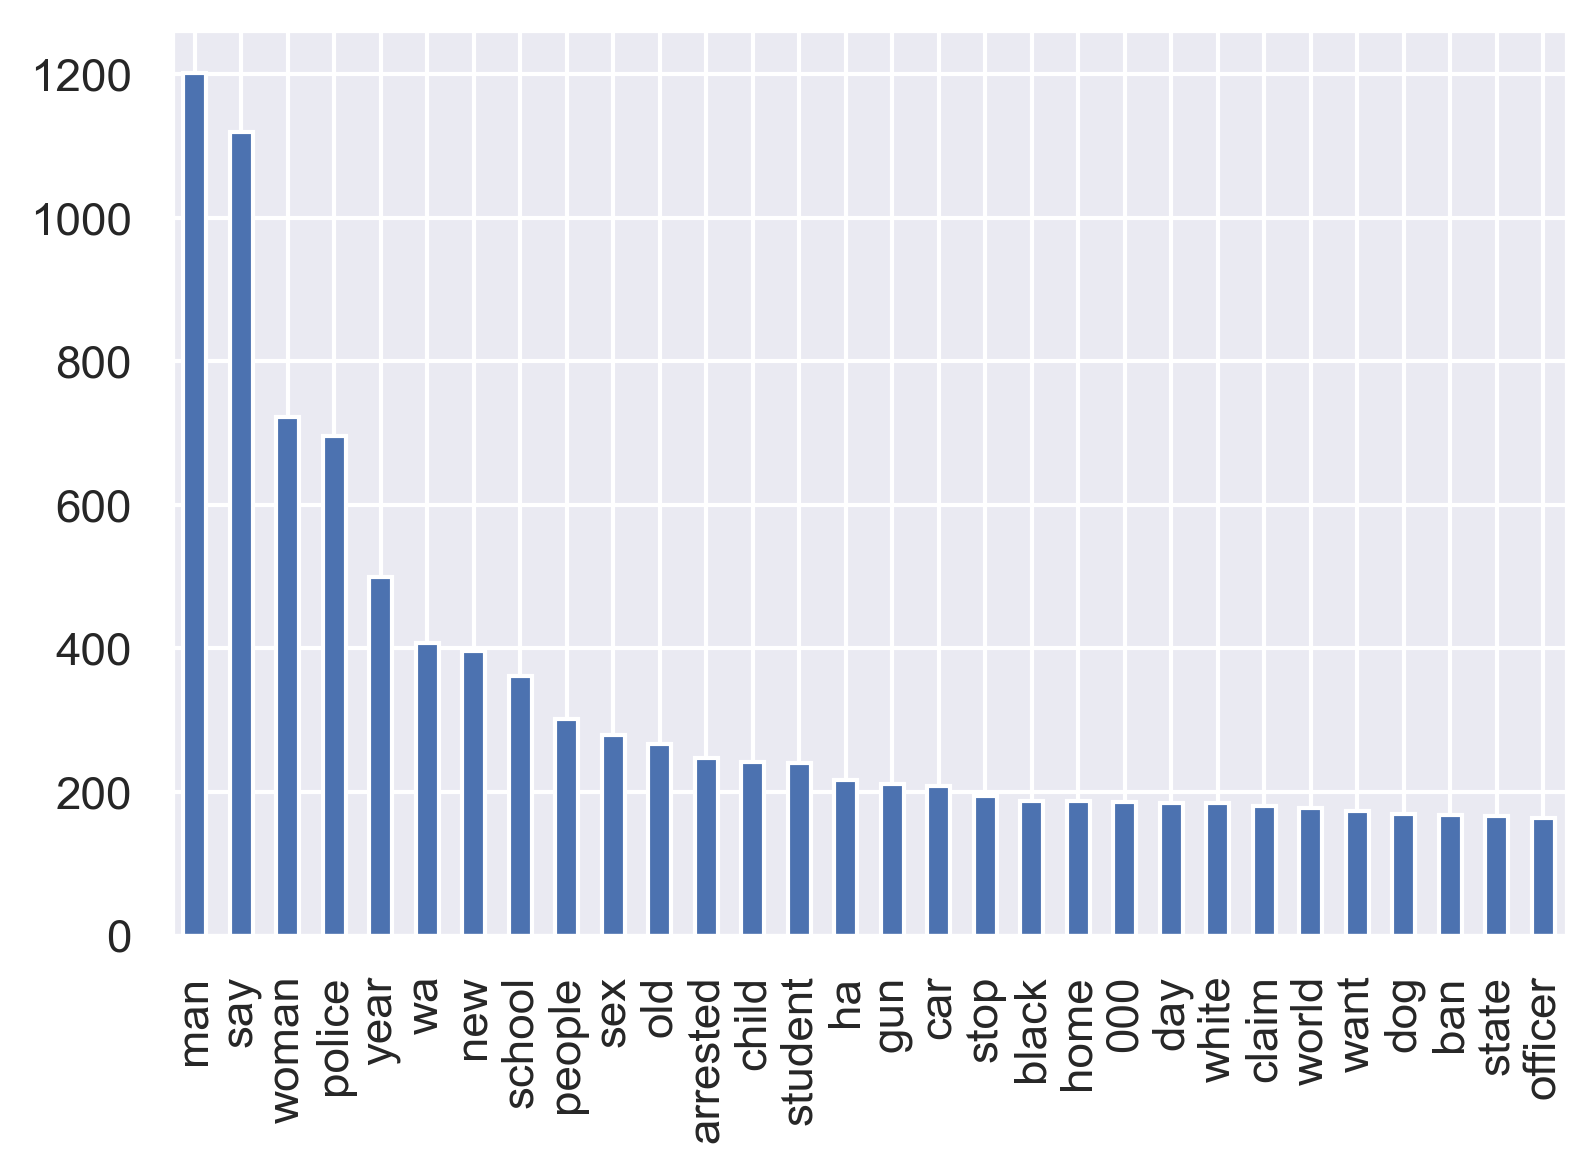

In [153]:
ntotitle_df.sum().sort_values(ascending=False).head(30).plot(kind='bar');

In [14]:
up_top100 = pd.DataFrame(uptitle_df.sum().sort_values(ascending=False).head(100))

In [19]:
up_top100.to_csv('up_top100.csv')

In [155]:
nto_top100 = pd.DataFrame(ntotitle_df.sum().sort_values(ascending=False).head(100))
nto_top100

,0
man,1202
say,1120
woman,722
police,696
year,499
...,...
restaurant,93
russian,92
help,92
10,91


In [20]:
nto_top100.to_csv('nto_top100.csv')

In [160]:
up_only = up_top100.copy()
up_only.index.names = ['word']
nto_only = nto_top100.copy()
nto_only.index.names = ['word']

In [161]:
up_only.head()

,0
word,
year,1587
man,855
old,836
woman,689
ha,659


In [166]:
antijoin_df = up_only.merge(nto_only, on='word', how='outer', indicator=True).query('_merge != "both"').drop('_merge', 1)

In [170]:
antijoin_df.columns = ['UpliftingNews_only', 'NottheOnion_only']

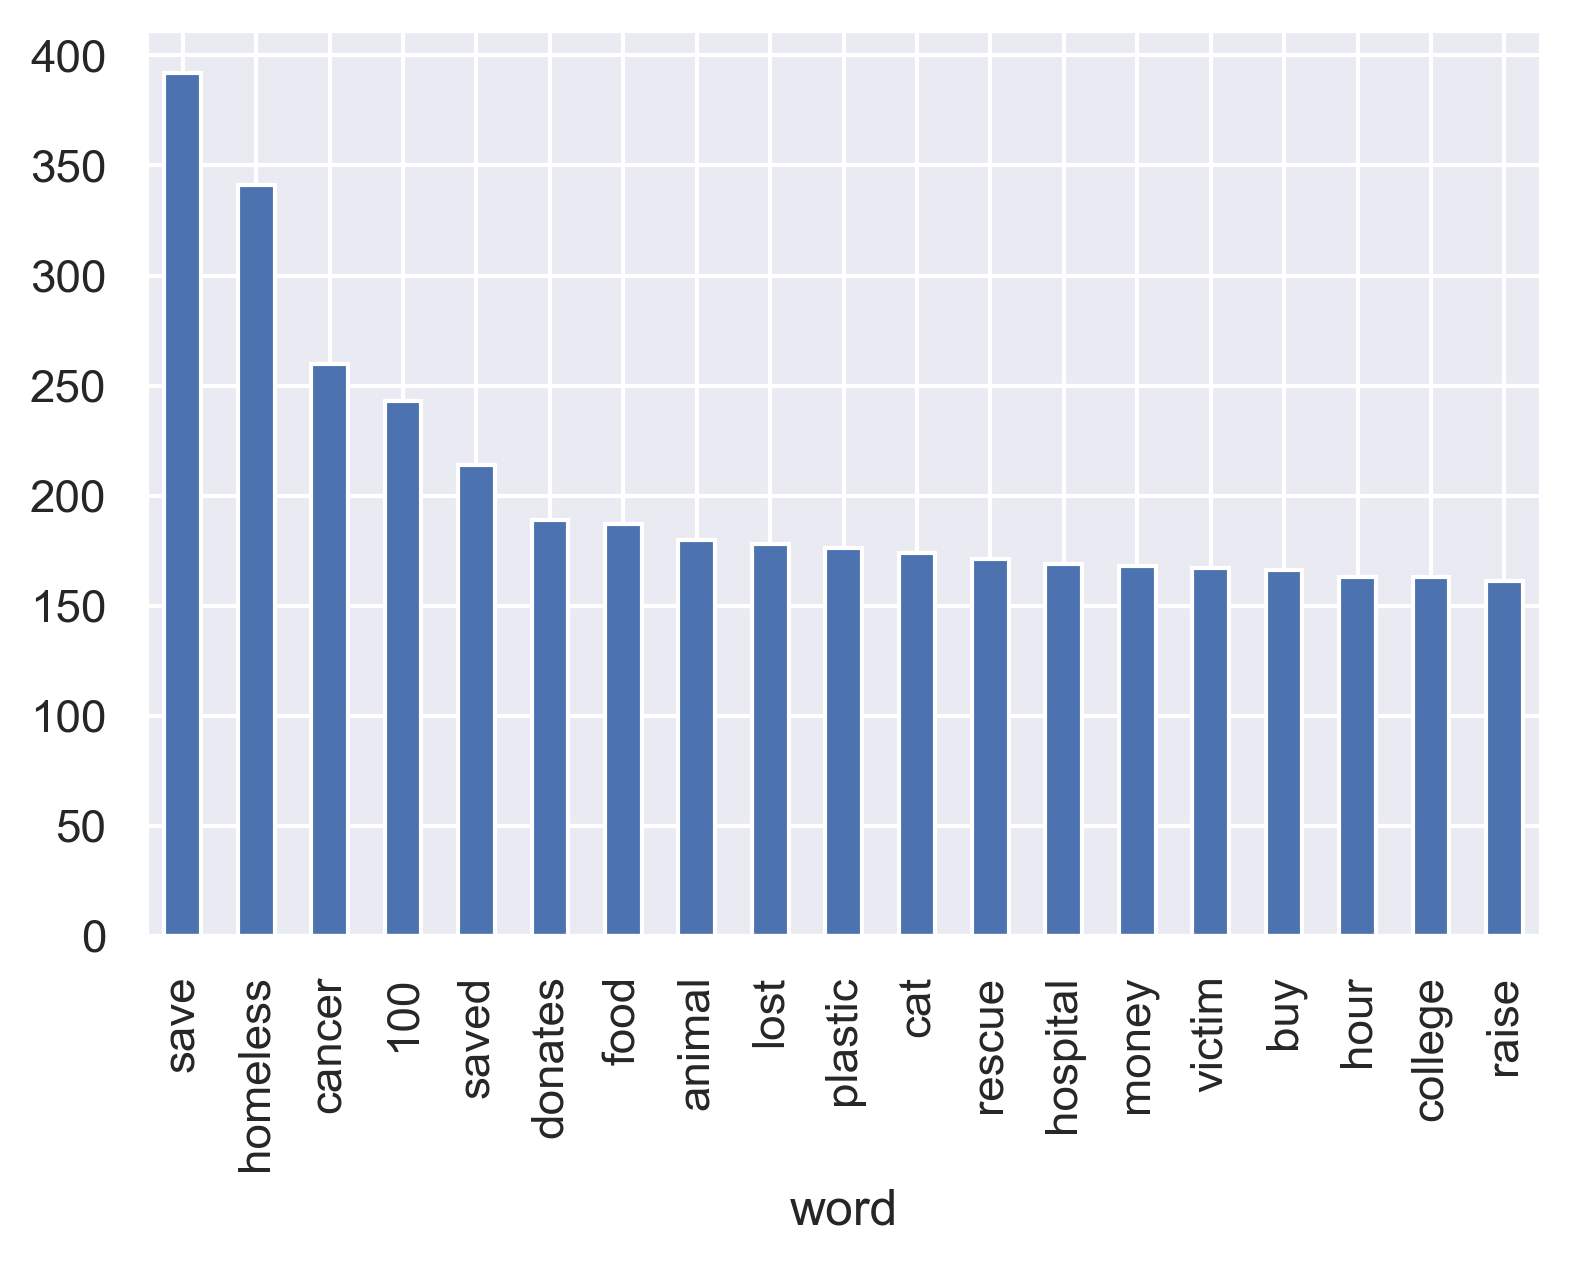

In [190]:
antijoin_df['UpliftingNews_only'][:19].plot(kind='bar');

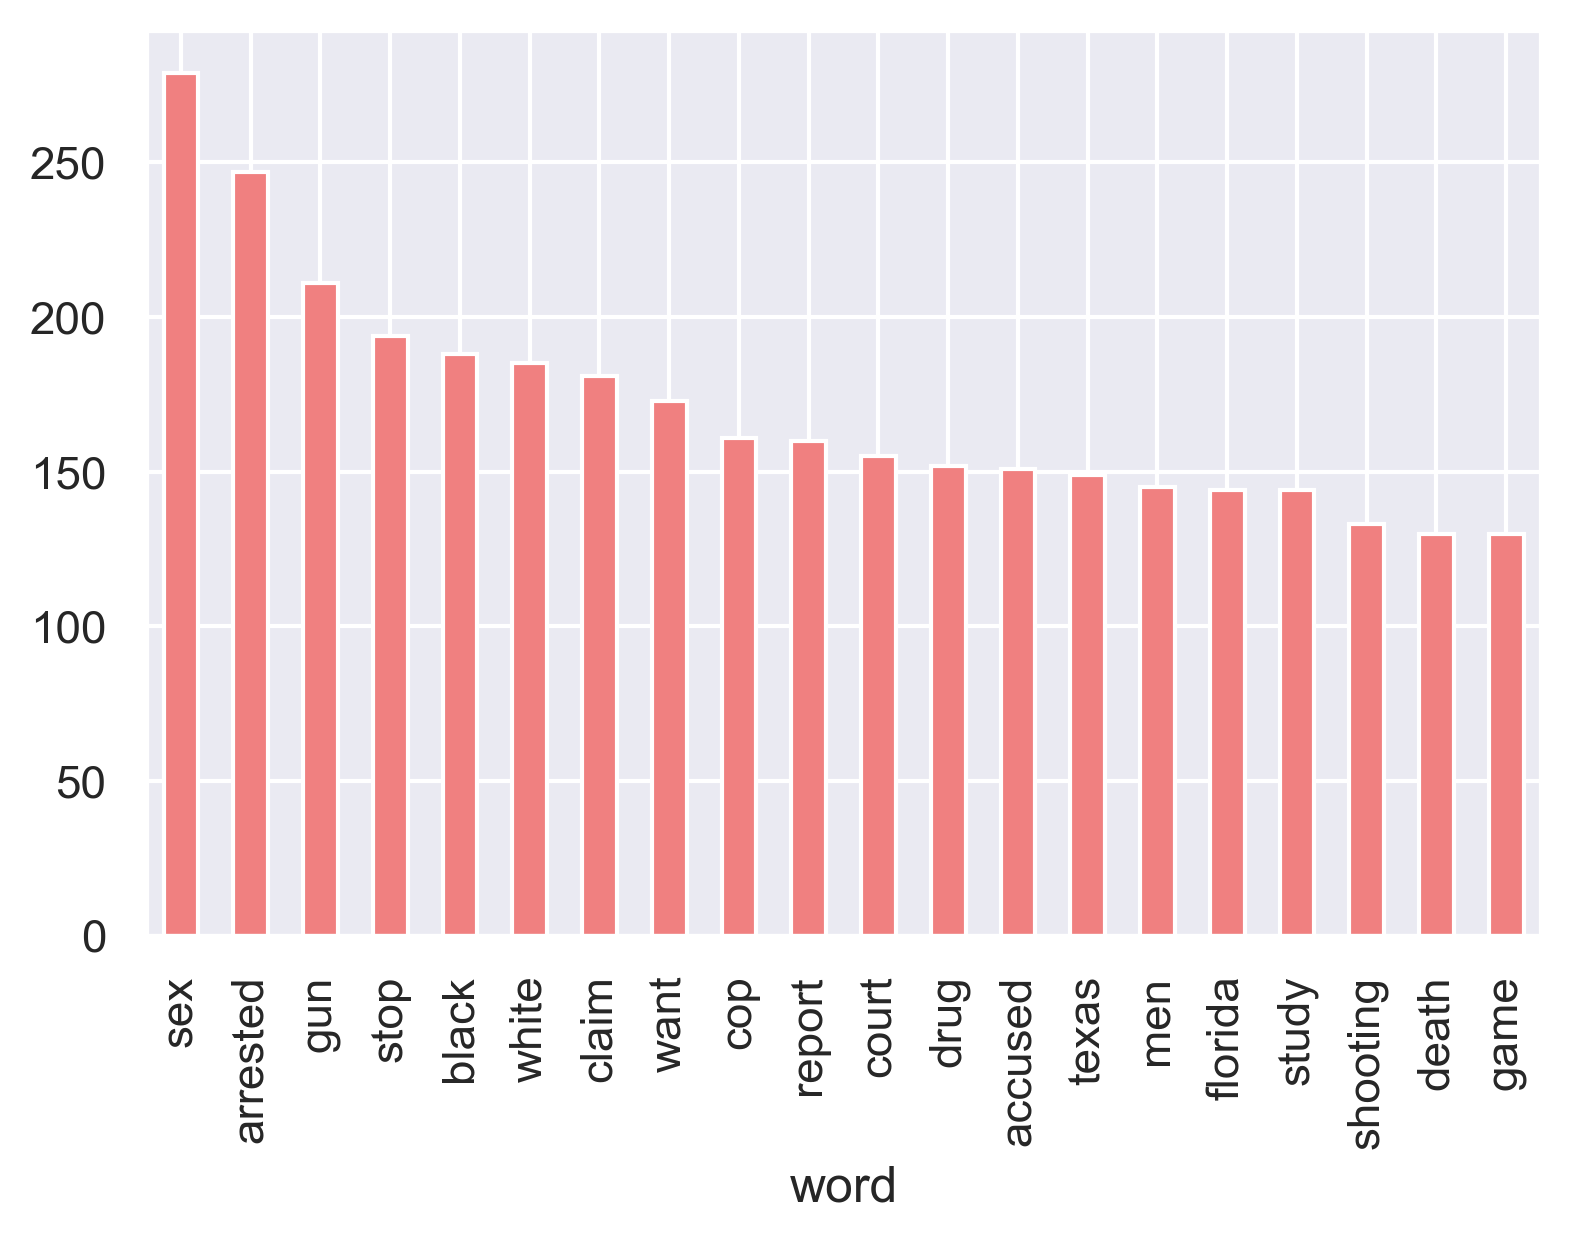

In [191]:
antijoin_df['NottheOnion_only'][51:71].plot(kind='bar', color='lightcoral');

In [198]:
sentiment = SentimentIntensityAnalyzer()
nto_list = list(nto_top100.index)
sentiment.polarity_scores(' '.join(nto_list))
df = pd.DataFrame(data=sentiment.polarity_scores(' '.join(nto_list)),
                  index=['NottheOnion'])
df

,neg,neu,pos,compound
NottheOnion,0.263,0.642,0.095,-0.9607


In [199]:
sentiment = SentimentIntensityAnalyzer()
up_list = list(up_top100.index)
sentiment.polarity_scores(' '.join(up_list))
df1 = pd.DataFrame(data=sentiment.polarity_scores(' '.join(up_list)),
                   index=['UpliftingNews'])
df1

,neg,neu,pos,compound
UpliftingNews,0.107,0.658,0.235,0.9485


In [200]:
sentiment_table = pd.concat([df1, df])
sentiment_table.reset_index(inplace=True)
sentiment_table.columns = [
    'subreddit', 'negative', 'neutral', 'positive', 'compound'
]

sentiment_table

,subreddit,negative,neutral,positive,compound
0,UpliftingNews,0.107,0.658,0.235,0.9485
1,NottheOnion,0.263,0.642,0.095,-0.9607


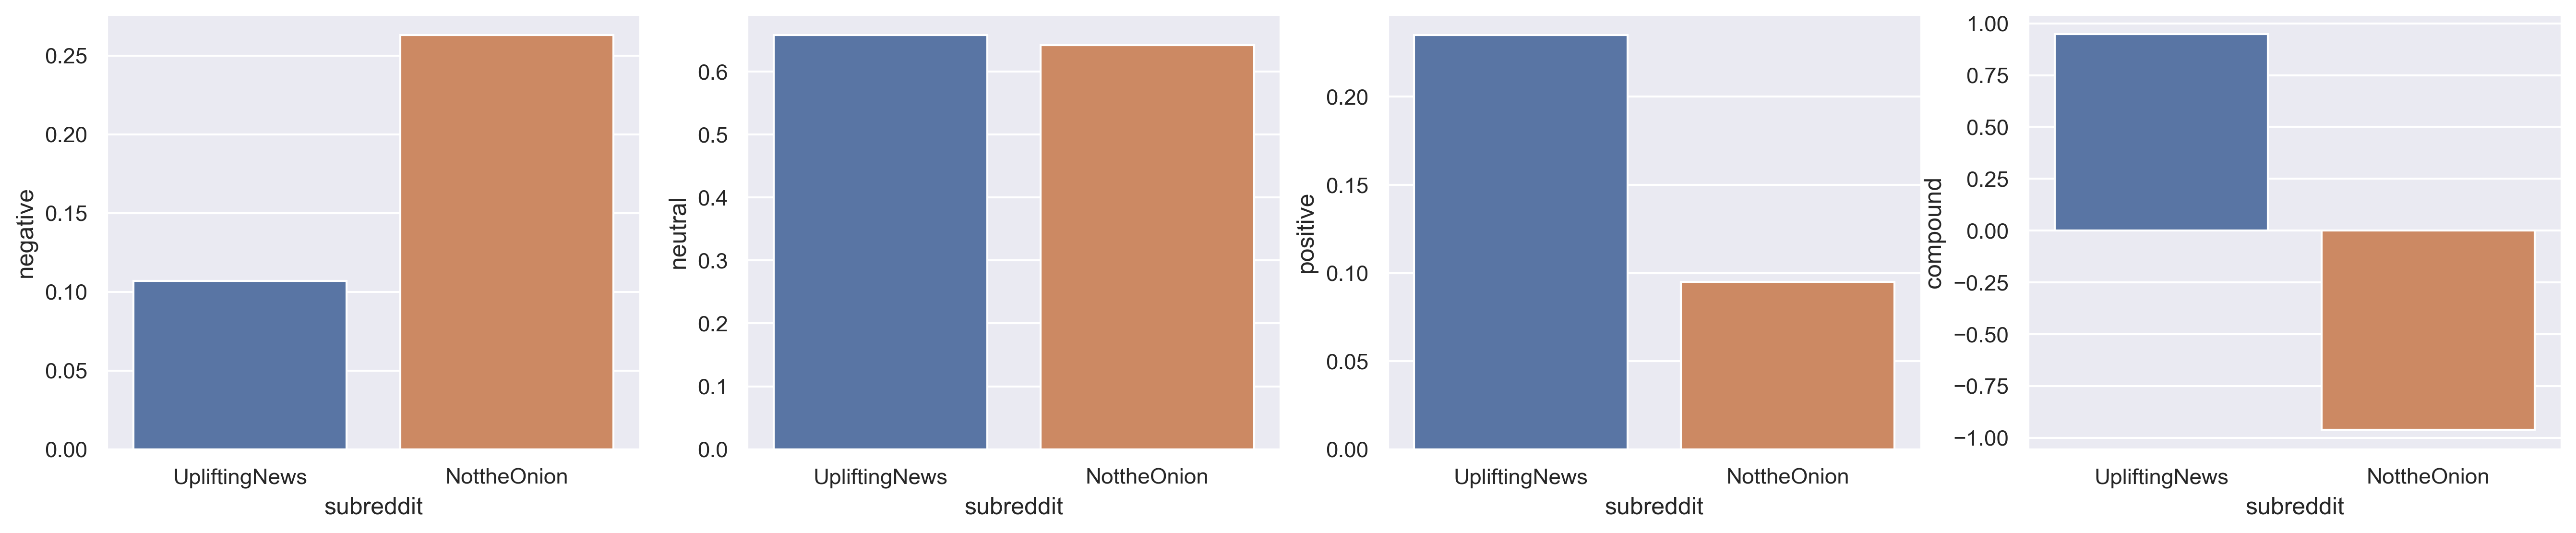

In [201]:
sentiment_list = ['negative', 'neutral', 'positive', 'compound']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))

for index, col in enumerate(sentiment_list):
    sns.barplot(x='subreddit', y=col, data=sentiment_table, ax=axes[index])

In [7]:
nottheonion_df.to_csv('nottheonion_df_postprocessing.csv', index=False)

In [8]:
uplifting_df.to_csv('uplifting_df_postprocessing.csv', index=False)

In [9]:
df = pd.concat([nottheonion_df, uplifting_df])

In [10]:
df.shape

(21472, 7)

In [11]:
df.tail()

,datetime,title,score,num_comments,subreddit,title_len,title_word_count
10731,2012-06-04 23:12:38,state of the subreddit address,527,41,UpliftingNews,31,5
10732,2012-06-02 15:06:36,after 13 year of determination dusty born with down syndrome earns a black belt in kung fu,124,13,UpliftingNews,95,17
10733,2012-05-26 12:57:01,special education student becomes prom king,44,10,UpliftingNews,43,6
10734,2012-05-24 14:59:58,uplifting indeed many thanks to this awesome little sub,59,14,UpliftingNews,57,10
10735,2012-05-23 01:33:02,girlfriend marries husband after he get in an accident sustains a serious brain injury i don t even care if this is religious propaganda it s beautiful,29,13,UpliftingNews,155,25


In [12]:
df.to_csv('big_df.csv', index=False)